<a href="https://colab.research.google.com/github/selogdata/silver-adventure/blob/main/elice_live_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

In [ ]:
# 형태 및 크기 확인
train.shape

In [ ]:
# NaN Null 값 개수
train.isnull().sum()

In [ ]:
# 자료형 확인
train.info()

In [ ]:
# 통계량 summary
train.describe()

# ??
## 연속형 vs. 범주형(이산형)

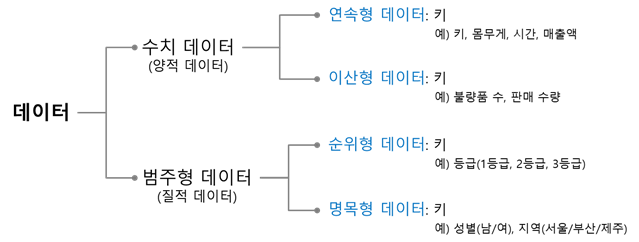

In [ ]:
train['Survived']==1

In [ ]:
# 성별에 따른 생존 여부
survived_sex = train[train['Survived']==1]['Sex']
print(survived_sex)
type(survived_sex) # 시리즈(array)

# 개념
## Series
- 1차원 벡터 vector

## DataFrame
- 2차원 이상 Matrix

In [ ]:
# 그림을 그려서 확인 ==> 인사이트 얻기
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() # 생존자 카운트
    dead = train[train['Survived']==0][feature].value_counts() # 사망자 카운트
    df = pd.DataFrame([survived, dead]) # [생존자, 사망자] df
    df.index = ['Survived', 'Dead'] # index
    df.plot(kind='bar', stacked=True, figsize=(10,5), color=['tomato','seagreen'])

In [ ]:
bar_chart('Sex')

## matplotlib ==> color
https://matplotlib.org/stable/gallery/color/named_colors.html

# 🌕 데이터 확인 필수
1. columns 확인
2. plot 그려보기

In [ ]:
train['Name']

In [ ]:
train['Name'].str

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.', expand=False) # 정규표현식

In [ ]:
train['Name'].str.extract('([^A-Za-z]+)\,', expand=False) # 정규표현식

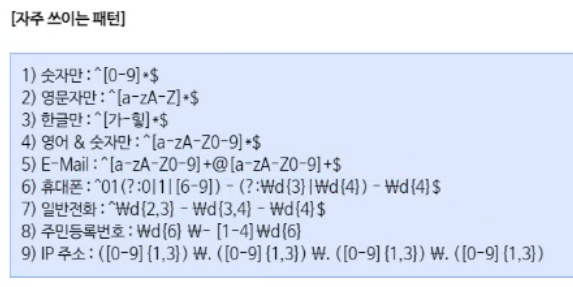

In [ ]:
원 핫 인코딩

In [ ]:
title_mapping = {
    'Mr': 0, 'Miss': 1, 'Mrs' :2, 
    'Master':3, 'Dr': 3, 'Rev': 3, 'Major': 3,
}


In [ ]:
train.groupby('Title')['Age'].head()

In [ ]:
# 결측치 채우기
train['Age'].filling(train.groupby('Title')['Age'].transform('median'), inplace=True)

# NaN Null
- 모델은 학습할 때, 결측값이 있으면 돌아가지 않는다.
- 따라서 뭐든지 채워 넣어야 한다.
- 검증하면서 여러 번 채워 넣어야 한다.

## 특정 데이터
0 => 결측값 입니다.
999 => missing_value NaN 0 | 999 | -1
NaN => 결측값을 채워 넣음

이상치
결측값

- 참고자료 : https://kaggle-kr.tistory.com/17

In [ ]:
=========================

# 파생변수
- family size
    - 함께 동승한 부모님과 아이들의 수, 형제, 배우자
    - 혼자 탑승한 것과 가족과 어떻게 다른가?

In [ ]:
train['FamilySize'] = train['SibSp']+train['Parch']+1

In [ ]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/train.csv')

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu_r')
plt.show() # 결측값이 있는 것만 보여주세요.

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno
msno.bar(df) # 결측값 그래프로 보기

In [ ]:
## 분포 확인하기

# Box plot
- 이상치 확인